In [260]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'movies.csv')

In [262]:
df.head()

,name,rating,genre,year,releasedd,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)","June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)","July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)","June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)","July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)","July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [29]:
# Missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [39]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [122]:
# Change data type of columns
df['gross'] = df['gross'].astype('Int64')
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross            Int64
company         object
runtime        float64
comma_index    float64
dtype: object

In [276]:
df['released'].astype(str)
df["year_correct"] = df['released'].astype(str).str[-4:]
df["year_correct"]

df

,name,rating,genre,year,releasedd,released,score,votes,director,writer,star,country,budget,gross,company,runtime,comma_index,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)","June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,7,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)","July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,6,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)","June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,7,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)","July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,6,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)","July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,7,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)","October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,10,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)","February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,10,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)","April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,8,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)","October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,9,2020


In [295]:
df = df.sort_values(by=["gross"], inplace=False, ascending=False)

In [285]:
#Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,releasedd,released,score,votes,director,writer,star,country,budget,gross,company,runtime,comma_index,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)","June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,7,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)","July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,6,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)","June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,7,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)","July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,6,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)","July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,7,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)","October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,10,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)","February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,10,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)","April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,8,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)","October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,9,2020


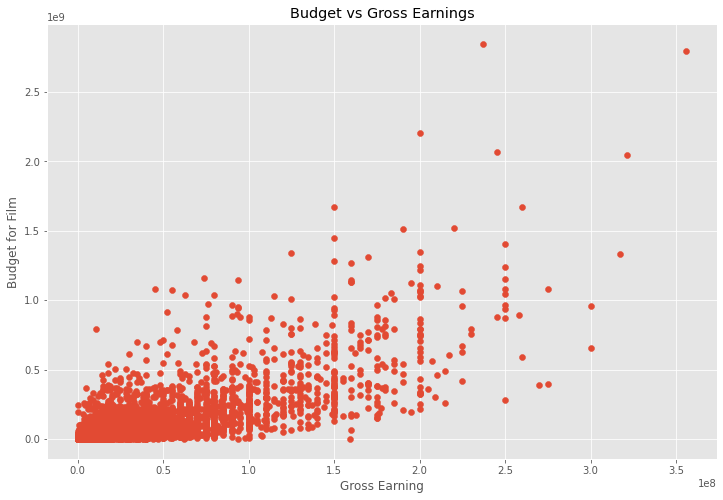

In [305]:
#Scatter plot budget vs gross

plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earning")
plt.ylabel("Budget for Film")
plt.show()

In [297]:
df.head()

,name,rating,genre,year,releasedd,released,score,votes,director,writer,star,country,budget,gross,company,runtime,comma_index,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)","December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,11,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)","April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,8,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)","December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,11,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)","December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,11,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)","April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,8,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

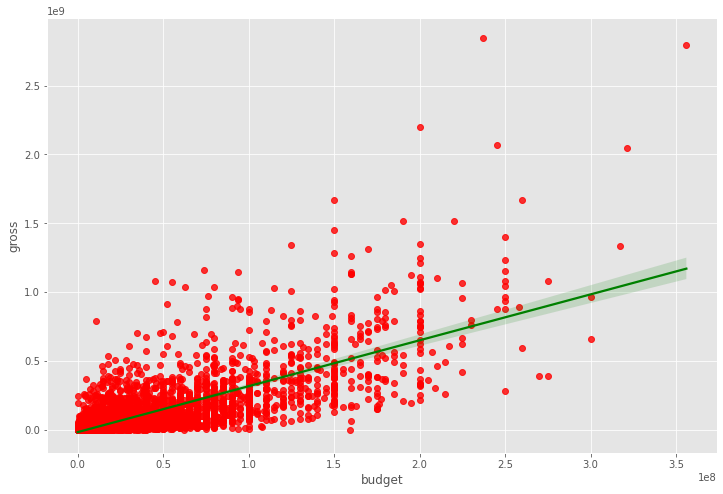

In [309]:
sns.regplot(x="budget",y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [317]:
df.corr(method="spearman") #kendall pearson

,year,score,votes,budget,gross,runtime,comma_index
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977,0.011612
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857,0.048310
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159,-0.002573
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370,-0.019464
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243,-0.022842
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000,0.046527
comma_index,0.011612,0.048310,-0.002573,-0.019464,-0.022842,0.046527,1.000000


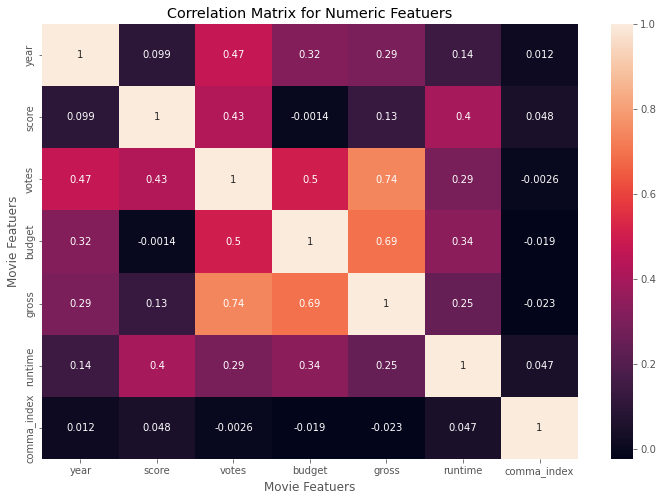

In [323]:
correlation_matrix = df.corr(method="spearman")

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Featuers")
plt.xlabel("Movie Featuers")
plt.ylabel("Movie Featuers")
plt.show()

In [333]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized 

,name,rating,genre,year,releasedd,released,score,votes,director,writer,star,country,budget,gross,company,runtime,comma_index,year_correct
5445,533,5,0,2009,696,611,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,11,29
7445,535,5,0,2019,183,154,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8,39
3045,6896,5,6,1997,704,617,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,11,17
6663,5144,5,0,2015,698,613,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,11,35
7244,536,5,0,2018,192,162,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,2583,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,10,40
7664,1678,-1,4,2020,1107,976,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,10,40
7665,4717,-1,6,2020,193,163,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,8,40
7666,2843,-1,6,2020,2817,2463,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,9,40
